#Nombre: Daniel Andres Vasquez Murillo

# Librerias

In [ ]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize
import copy
import scipy.linalg as la

# Codigo

### Punto 3

In [ ]:
# Contruccion de la matriz

def contructor_matriz(n):
  A = np.zeros((n,n))
  for i in range(n):
    A[i,:i+1] = n - (i)
    for j in range(i+1, n):
      A[i,j] = n - j
  return A

n = 5
A = contructor_matriz(n)
print("Matriz n =", n)
print("")
print(A)
print("")

# Funcion de los valores propios

def valores_propios(n):
  valores = []
  for i in range(n+1):
    if 1 <= i and i <= n:
       valores.append((1/(2-(2*np.cos(((2*i-1)*np.pi)/(2*n+1))))))
  return valores

print("Valores propios de la matriz mediante la funcion\n\n", valores_propios(n))

print("")

print("Valores propios de la matriz mediante linalg \n\n", np.linalg.eig(A)[0])

Matriz n = 5

[[5. 4. 3. 2. 1.]
 [4. 4. 3. 2. 1.]
 [3. 3. 3. 2. 1.]
 [2. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1.]]

Valores propios de la matriz mediante la funcion

 [12.343537519677051, 1.4486905697966428, 0.5829644982937404, 0.3532532828937386, 0.2715541293388212]

Valores propios de la matriz mediante linalg 

 [12.34353752  1.44869057  0.5829645   0.35325328  0.27155413]


### Punto 4

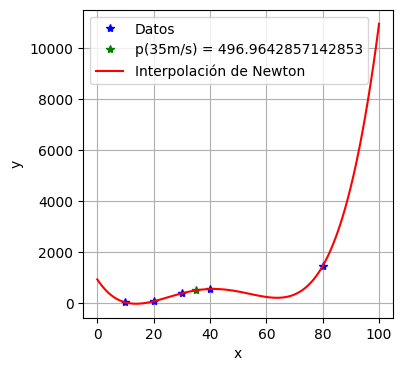

p(35m/s) = 496.9642857142853


In [ ]:
def mat_new(x, y):
    n = len(x)
    L = np.zeros((n, n))
    L[:, 0] = np.ones((1, n))
    for j in range(1, n):
        for i in range(j, n):
            pro = 1
            for k in range(0, j):
                pro = pro * (x[i] - x[k])
            L[i, j] = pro
    c = np.linalg.solve(L, y)
    return L, c

def poli_new(x, c, x_var):
    n = len(c)
    result = c[0]
    for i in range(1, n):
        term = c[i]
        for j in range(i):
            term *= (x_var - x[j])
        result += term
    return result

x = np.array([10, 20, 30, 40, 80], float)
y = np.array([25, 70, 380, 550, 1450], float)
[L, c] = mat_new(x, y)

x_interp = np.linspace(0, 100, 100)
y_interp = poli_new(x, c, x_interp)

plt.figure(figsize=[4, 4])
plt.plot(x, y, 'b*', label='Datos')
plt.plot(35, poli_new(x, c, 35), 'g*', label=f'p(35m/s) = {poli_new(x, c, 35)}' )
plt.plot(x_interp, y_interp, 'r', label='Interpolación de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print(f'p(35m/s) = {poli_new(x, c, 35)}')